# <center>Machine Learning Foundation Nanodegree</center> 
## <center>Project 3-Titanic Data Investigation</center>
*<center>Created by Pradnyesh Gumaste</center>*

# 1. Introduction

The sinking of the RMS Titanic remains to be one of the most catastrophic event occured in the history of Sea Travel. The humoungous ship during her inaugral voyage sank into the unfathomable North Atlantic Ocean on April 15, 1912 after colling with an unprecedented iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and hence led to better safety regulations for sea travel.

One of the major reasons responsible for such a tragic large scale loss of life was due to the inadequate supply of lifeboatds on the ship for the crew and passengers. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

## 1.1 About the dataset

The dataset of study contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. The variables included are:

----------------------------
| variable | 	Definition | 
|:---------: |:-------------------------------------------:|
| survival | Survival <br>(0 = No; 1 = Yes) |
| pclass   | Passenger Class <br>(1 = 1st; 2 = 2nd; 3 = 3rd)|
| name     | Name |
| sex      | Sex  |
| age      | Age  |
| sibsp    | Number of Siblings/Spouses Aboard |
| parch    | Number of Parents/Children Aboard |
| ticket   | Ticket Number |
| fare     | Passenger Fare|
| cabin    | Cabin |
| embarked | Port of Embarkation <br>(C = Cherbourg; Q = Queenstown; S = Southampton) |
------------------------------------------------------------------

```
SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.
```

# 2. Data Analysis and Data Wrangling
## 2.1 Making questions

In this analysis we are going to answer some questions and visualize them.

   * Is the phrase 'women and children first' valid for this event?
   * Did Man with children or spouse had more chances of survival?
   * The comparision of survival by Class and Gender.
   * Did first class passengers more chances of survive?
   * What is the best age for survival in the given data set?
   
## 2.2 Investigating data

First of all lets explore the dataset in order to find surprising data points and fix any problems there could be.

In [24]:
#importing of required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numbers import Number
import ipy_table as tbl
from scipy import stats
#allow plots and visualisations to be displayed in the report
%pylab inline

titanic_function = pd.read_csv("titanic_data.csv")
titanic_function.head()


Populating the interactive namespace from numpy and matplotlib


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


To answer the questions we won't need all the given fields so to clean and prepare the data (if needed) we are going to remove redundant columns and  just take *Survived, Name, Pclass, Sex, Age, SibSp and Parch*.

In [25]:
def as_percent(val, precision='0.2'):
    """Convert number to percentage string."""
    if isinstance(val, Number):
        return "{{:{}%}}".format(precision).format(val)
    else:
        raise TypeError("Numeric type required")

def calculate_percentage(val, total, format_percent = False):
    """Calculates the percentage of a value over a total"""
    percent = np.divide(val, total, dtype=float)
    if format_percent:
        percent = as_percent(percent)
    return percent

We create the above two functions, which we shall be using in the data wrangling section below.

In [26]:
titanic_function = titanic_function[["Survived", "Name", "Pclass", "Sex", "Age", "SibSp", "Parch"]]
titanic_function.describe(include="all")

,Survived,Name,Pclass,Sex,Age,SibSp,Parch
count,891.000000,891,891.000000,891,714.000000,891.000000,891.000000
unique,NaN,891,NaN,2,NaN,NaN,NaN
top,NaN,"Graham, Mr. George Edward",NaN,male,NaN,NaN,NaN
freq,NaN,1,NaN,577,NaN,NaN,NaN
mean,0.383838,NaN,2.308642,NaN,29.699118,0.523008,0.381594
std,0.486592,NaN,0.836071,NaN,14.526497,1.102743,0.806057
min,0.000000,NaN,1.000000,NaN,0.420000,0.000000,0.000000
25%,0.000000,NaN,2.000000,NaN,20.125000,0.000000,0.000000
50%,0.000000,NaN,3.000000,NaN,28.000000,0.000000,0.000000
75%,1.000000,NaN,3.000000,NaN,38.000000,1.000000,0.000000


As we can observe in the above table,five of the seven selected field are numeric so the *describe* function is used to show a better summary of them. We can't see anything strange except some missing values in the age field (714/891).

In [27]:
print titanic_function["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64


The main problem of this data tends to exist in the missing values of the **age** field. <br>
Hence we decide to opt for listwise deletion since representing the ages with the average or linear regression doesnt fit the investigation.  

In [28]:
titanic_function = titanic_function[titanic_function["Age"].notnull()]
len(titanic_function)

714

## 2.3 Mapping data
In order to intrepret the data easier the following fields need to be modified:
<ul>
<li>Survived - changed to boolean (1 = True, 0 = False)
<li>Pclass - changed to Socio-Economic status (1st - Upper Class, 2nd - Middle Class, 3rd - Lower Class)
<li>Embarked - changed to name of embarkation port (C = Cherbourg; Q = Queenstown; S = Southampton)
</ul>
I will also add a Family Size column so that I can compare the size of families with the number of survivors.

In [29]:
def map_data(df):
    '''
    Function which takes the original dataframe and returns a 
    clean / updated dataframe
    '''
    # survived map
    survived_map = {0: False, 1: True}
    df['Survived'] = df['Survived'].map(survived_map)

    # PClass map
    pclass_map = {1: 'Upper Class', 2: 'Middle Class', 3: 'Lower Class'}
    df['Pclass'] = df['Pclass'].map(pclass_map)
    
    # add new column (FamilySize) to dataframe - sum of SibSp and Parch
    df['FamilySize'] = df['SibSp'] + df['Parch']
    
    return df

titanic_function = map_data(titanic_function)
titanic_function.head(3)

,Survived,Name,Pclass,Sex,Age,SibSp,Parch,FamilySize
0,False,"Braund, Mr. Owen Harris",Lower Class,male,22.0,1,0,1
1,True,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Upper Class,female,38.0,1,0,1
2,True,"Heikkinen, Miss. Laina",Lower Class,female,26.0,0,0,0


## 2.4 Number of Survivors
Before trying to determine the characteristics of a passenger that would make them more likely to survive, the number of survivors in the sample should be compared to the actual number of survivors. Based on the information provided by the source of the dataset (Kaggle) there were 2224 passengers and 722 survivors.


In [30]:
# passengers and number of survivors based on Kaggle results
kaggle_passengers = 2224
kaggle_nonsurvivors = 1502
kaggle_survivors = kaggle_passengers - kaggle_nonsurvivors 

# Count number of passengers and number of survivors in sample data
sample_passengers = len(titanic_function)
sample_survivors = len(titanic_function[titanic_function.Survived==True])
sample_nonsurvivors = sample_passengers - sample_survivors


survivors_data = titanic_function[titanic_function.Survived==True]
non_survivors_data = titanic_function[titanic_function.Survived==False]

survivors = [
    ['Item','Kaggle (Count)','Kaggle (%)' ,'Sample Dataset (Count)', 'Sample Dataset (%)'],
    ['Total Passengers',kaggle_passengers,'-', sample_passengers,'-'],
    ['Survivors',
         kaggle_survivors,
         calculate_percentage(kaggle_survivors,kaggle_passengers, True), 
         sample_survivors,
         calculate_percentage(sample_survivors,sample_passengers, True) 
    ],
    ['Non-survivors', 
         kaggle_nonsurvivors,
         calculate_percentage(kaggle_nonsurvivors,kaggle_passengers, True), 
         sample_nonsurvivors,
         calculate_percentage(sample_nonsurvivors,sample_passengers, True) 
    ]
]
tbl.make_table(survivors)

Item,Kaggle (Count),Kaggle (%),Sample Dataset (Count),Sample Dataset (%)
Total Passengers,2224,-,714,-
Survivors,722,32.46%,290,40.62%
Non-survivors,1502,67.54%,424,59.38%


When comparing the number of survivors from the sample dataset to the actual number of survivors we can see that the percentage of survivors is realitively close to each other.

# 3. Answering questions

### 3.1 Is the phrase 'women and children first' valid for this event?

Depending on age and sex,we try to plot how survivors are distrubuted based on the mentioned attributes(namely Age and Sex). To fin out if the passenger is a child or not, we're going to add a column *IsChild* with values 0 if age is greather than 18 and 1 if it's less than or equal 18.

In [31]:
def isChild(x):
    if x > 18:
        return 'adult'
    else:
        return 'child'
titanic_function["IsChild"] = pd.Series(titanic_function["Age"].apply(isChild), index=titanic_function.index)


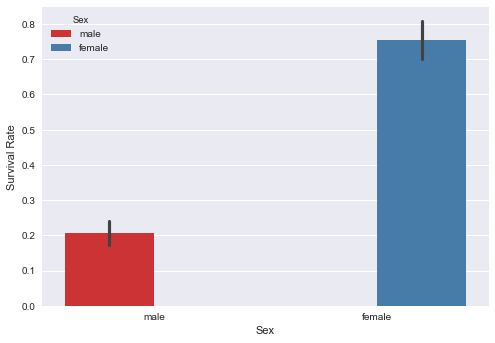

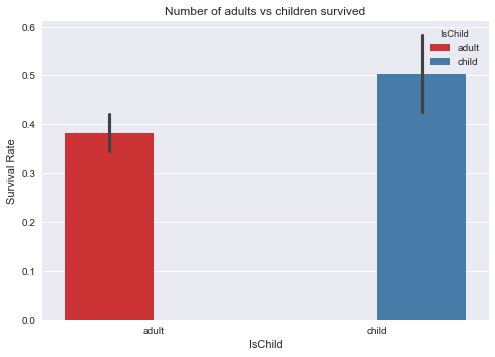

In [32]:

sns.set(style="darkgrid")
sns.barplot(data=titanic_function,x="Sex",y="Survived", palette="Set1",hue="Sex")
plt.ylabel("Survival Rate")
sns.plt.show()
sns.barplot(data=titanic_function,x="IsChild",y="Survived",hue="IsChild", palette="Set1").set_title("Number of adults vs children survived")
plt.ylabel("Survival Rate")
sns.plt.show()

In the first plot, the red bar represents the men survived and blue represents women survived in the whole event.
In the second plot, the red plot comprises of adults surviving and blue bar represent the children surviving.

From the above obtained plots, we can clearly recognize that the probablity of survival is much greater in woman as compared to the survival of men.Analoguously we can also observe that the prbablity of survival greater in children than compared to the adults.<br>
Ergo we can confirm in this case that it was true that *women and children first* and it was applicable to this dataset of the titanic survivors.


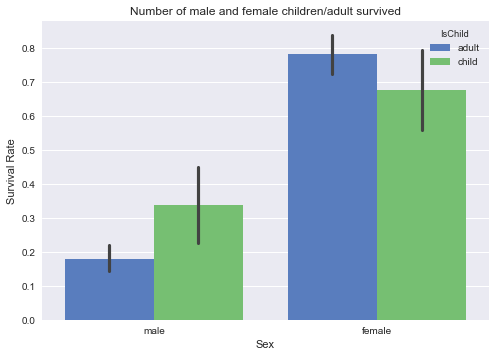

In [33]:
sns.barplot(data=titanic_function, x="Sex", y="Survived", hue="IsChild", palette="muted").set_title("Number of male and female children/adult survived")
plt.ylabel("Survival Rate")
sns.plt.show()

In the above plot , we confirm that female children had less survival mean than adults females.

### 3.2 Did Man with children or spouse had more chances of survival?

In order to ascertain if the man with children or spouse had more chances of survival, we were are going to create a new categorized field *FamilyMan* with value 3 values depending if he is Single, Husband, or Father(husband with kids).<br>
We have to know that in this case we are going to work with a subset of males that are not child. Once we have just adult men subset, we can't know if he had spouse or sibling so we asume *SibSp* field refers to spouse.

In [34]:
import warnings
warnings.filterwarnings('ignore')

def isAdultMan(x):
    return x["IsChild"] == 'adult' and x["Sex"] == "male"

man_titanic_function = titanic_function[titanic_function.apply(isAdultMan, axis=1)]

def isFamilyMan(x):
    if x["SibSp"] > 0:
        if x["Parch"] > 0:
            return "Father"
        else:
            return "Husband"
    else:
        return "Single"
man_titanic_function["FamilyMan"] = pd.Series(man_titanic_function.apply(isFamilyMan, axis=1), index=man_titanic_function.index)
print man_titanic_function["FamilyMan"].value_counts()

Single     299
Husband     59
Father      24
Name: FamilyMan, dtype: int64


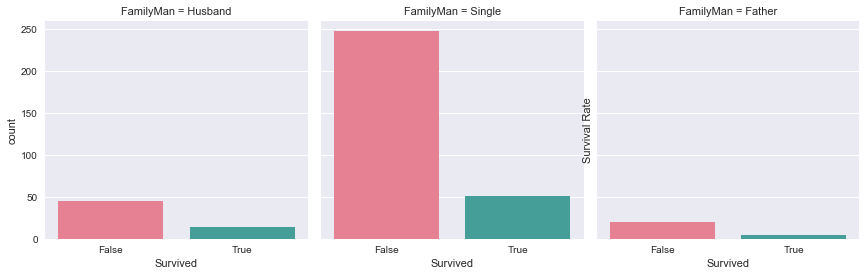

In [38]:
sns.factorplot(data=man_titanic_function,x="Survived", col="FamilyMan", kind="count",palette="husl")
plt.ylabel("Survival Rate")
sns.plt.show()


<center>&#8593;</center><br>

<center>Comparision of different categories of men survived</center>

After comparing all the three plots above, we can find out that Husbands had higher chance of survival as compared to Fathers and Fathers had higher chance of survival as compared to Singles. <br>
We can find out the percentage of survival of each of the three defined category of men adults by the following code snippet 
<center>&#129155;</center>

In [62]:
def percentSurvived(x, type):
    sub = x[x["FamilyMan"] == type]
    total = len(sub)
    survived = sum(sub["Survived"] == 1)
    return float(survived)/total * 100

print "Percent of Singles survived:", percentSurvived(man_titanic_function,"Single")
print "Percent of Husbands survived:", percentSurvived(man_titanic_function,"Husband")
print "Percent of Fathers survived:", percentSurvived(man_titanic_function,"Father")

Percent of Singles survived: 17.0568561873
Percent of Husbands survived: 23.7288135593
Percent of Fathers survived: 16.6666666667


We can appreciate a difference in the percent of survived husbands.

### 3.3 The comparision of survival by Class and Gender.

In this point we are going to plot the three fields join and see what can we conclude.

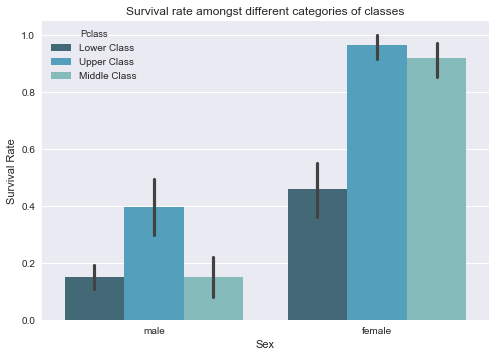

In [39]:
sns.barplot(data=titanic_function, x="Sex", y="Survived", hue="Pclass", palette="GnBu_d").set_title("Survival rate amongst different categories of classes")
plt.ylabel("Survival Rate")
sns.plt.show()

Pertaining to the above plotted graph, we can make following observations:-
<br>
1) The number of females survived in 1<sup>st</sup> class and 2<sup>nd</sup>class almost doubles that of the number of females survived in 3<sup>rd</sup>class. As a result we can advert our attention to the fact that 1<sup>st</sup> class and 2<sup>nd</sup>class females had much better chance of survival than compared to 3<sup>rd</sup> class female travellers.
<br>
2) In case of men, just the first class have difference in survived mean. The 2<sup>nd</sup>class and 3<sup>rd</sup>class have same number of men surviving
<br>
3) As we noticed in **_2.3.1_**, we once again notice that men had lower chance of survival as compared to that of women. 

### 3.4 Did first class passengers more chances of survive?
In the above questions, we found out that there was a striking differences between the means of survival amongst different classes. Now we will try to analyze the same without differentiating the genders as two different categories(Male and Female)

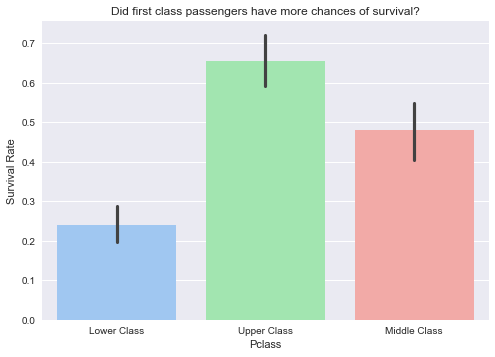

In [40]:
sns.barplot(data=titanic_function, x="Pclass", y="Survived", palette="pastel").set_title("Did first class passengers have more chances of survival?")
plt.ylabel("Survival Rate")
sns.plt.show()

##### Analysis of the above plots

The above plot compares the survival rate between the three different types of travel classes,namely
<ol>
<li>1<sup>st</sup>Class
<li>2<sup>nd</sup>Class
<li>3<sup>rd</sup>Class
</ol>
<br>
The plot explains by graphical and pictorial means that the surival rate of 1<sup>st</sup>Class class was greatest amongst the three different classes while the survival of 3<sup>rd</sup>Class was the least, hence answering our question that First class passengers did indeed have better chances of survival.

### 3.5 What is the best age for survival in the given data set?
We begin investigating the above question by plotting the distribution of survivors by age.

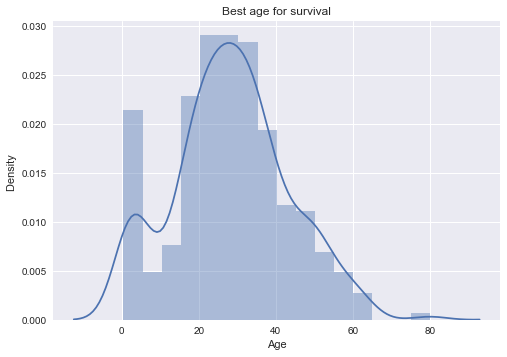

In [41]:
survivors_ages = titanic_function[titanic_function["Survived"] == 1]["Age"]
ax = sns.distplot(survivors_ages)
ax.set(xlabel='Age', ylabel='Density ')
ax.set_title("Best age for survival")
sns.plt.show()

In this plot we can see that most of the survivors had an age from 20 to 40 but, what happens if we also compare not survivors as well?

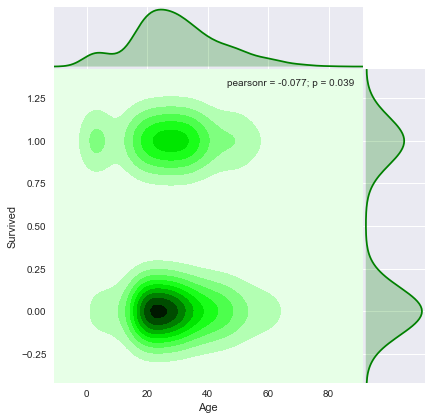

In [43]:
sns.jointplot("Age", "Survived", data=titanic_function,
                   kind="kde", space=0, color="g")
sns.plt.show()

We also see that not survivors mostly had between 20 and 40 years old. 
<br>So,we are going to calculate the percentage of survivors for each age.

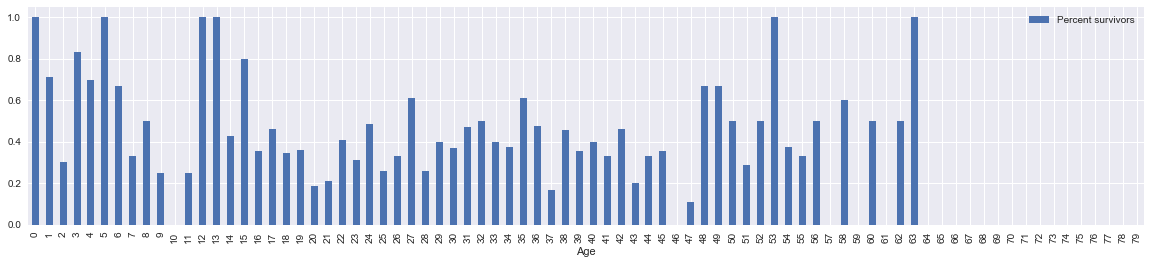

In [44]:
max_age = int(titanic_function["Age"].max())
age_dist = pd.DataFrame(index=xrange(max_age),columns=["Survived", "NotSurvived"])
age_dist = age_dist.fillna(0)
for age in age_dist.index:
    age_survive = titanic_function[titanic_function["Age"].astype(int) == age]["Survived"]
    age_dist.loc[age, "NotSurvived"] = sum(age_survive == 0)
    age_dist.loc[age, "Survived"] = sum(age_survive == 1)

survived_proportions = age_dist.Survived / age_dist.sum(axis="columns")
survived_proportions = survived_proportions.fillna(0)
survived_proportions.index.name = "Age"
survived_proportions.name = "Percent survivors"
survived_proportions.plot(kind="bar", figsize=(20,4),legend=True)


This plot shows the percentage of survived person by age. We see that there are some ages with 100% of survivors. These are 0, 5, 12, 13, 53 and 63 years old. 
<br>However,in order to choose one age for best survival, lets take the one with the most survivors.

In [45]:
print "Maximum number of survived passengers: ", age_dist.loc[[0, 5, 12, 13, 53, 63]].Survived.max()
print "Best survive age: ", age_dist.loc[[0,5, 12, 13, 53, 63]].Survived.idxmax()

Maximum number of survived passengers:  7
Best survive age:  0


## 4. Conclusions

## 4.1 Insights:-
In the previous answers, we've assumed there is no difference between proportions for each sample. But what happens if this is not true? <br>
There is a way to know if this difference is significant and therefore the conclusion given in the answers may not be true. With a two-proportion z-test we can determine wether the difference between two proportions is significant.

So in the first question, *Is the phrase 'women and children first' valid for this event?*, we observed that the survivors mean was higher in female than in male and also the same in children agains adults.

Let's conduct a hypothesis test to see if there is a significant difference between proportions. In first place, male and female:

$$H_{0} : P_{male} - P_{female} = 0$$ $$H_{A} : P_{male} - P_{female} \neq 0$$

In [46]:
male = titanic_function[titanic_function["Sex"]== "male"]
female = titanic_function[titanic_function["Sex"]== "female"]
total_people = len(male) + len(female)
print "total people :", total_people
print "males :", len(male)
print "females :", len(female)

total people : 714
males : 453
females : 261


To be able to perform the test, the following four counditions need to be met:
    
   * The sampling method for each population is simple random sampling.
   * The samples are independent.
   * Each sample includes at least 10 successes and 10 failures.
   * Each population is at least 20 times as big as its sample.
   
And in this case not all the conditions are true, the population is not 20 times bigger, but we are going to assume it's enough.

So lets continue the test, using the **two-proportion z-test** and a significance level ** $\alpha = 0.05 $ **

**Pooled sample proportion**:
$$p = \frac{p_{male} * n_{male} + p_{female} * n_{female}}{n_{male} + n_{female}}$$
**Standard error**:
$$SE = \sqrt{p * (1-p) * (\frac{1}{n_{male}} + \frac{1}{n_{female}})}$$
**Test statistic**:
$$z = \frac{p_{male} - p_{female}}{SE}$$


In [47]:
import math
p_male = float(len(male[male["Survived"] == 1])) / len(male)
p_female = float(len(female[female["Survived"] == 1])) / len(female)
p = (p_male * len(male) + p_female * len(female)) / total_people
print "p :", p
SE = math.sqrt(p * ( 1 - p ) * ( float(1)/len(male) + float(1)/len(female) ))
print "SE : ", SE
z = (p_male - p_female) / SE
print "z :", z

p : 0.406162464986
SE :  0.0381648418165
z : -14.3978392843


Given that z-score, the P-value is going to be very very small (smaller than our significance level 0.05). So we can consider reject the null hypothesis and say that in this scenario there is a significant difference between proportions.

Doing the same with child/adult scenario, values are:

In [48]:
child = titanic_function[titanic_function["IsChild"]== 'adult']
adult = titanic_function[titanic_function["IsChild"]== 'child']
print "total people :", total_people
print "childs :", len(child)
print "adults :", len(adult)
p_child = float(len(child[child["Survived"] == 1])) / len(child)
p_adult = float(len(adult[adult["Survived"] == 1])) / len(adult)
p = (p_child * len(child) + p_adult * len(adult)) / total_people
print "p :", p
SE = math.sqrt(p * ( 1 - p ) * ( float(1)/len(child) + float(1)/len(adult) ))
print "SE : ", SE
z = (p_child - p_adult) / SE
print "z :", z

total people : 714
childs : 575
adults : 139
p : 0.406162464986
SE :  0.0464185423935
z : -2.60646759703


And the P-value for P(z > 2.606) = 0.0039 in a two-tailed test is 0.0039 + 0.0039. So **P-value = 0.0078**, smaller than 0.05 and again the difference between proportions are significant.

You can see that this same test can be done with many other answers (all where proportions are compared).

The main conclusion about these questions is that the data set is not a good sample to perform some analysis and made conclusions about the population.

## 4.2 Limitations of dataset
The are a number of limitations with the Titanic Dataset, which are caused by:
- missing data
- only been a sample of the data

The missing data and size of the sample could skew the results for example the missing ages.

## 4.3 Other variables
As with most datasets the more information we have the better it can be analysed. I believe that we could add the following variables:
- passenger or crew - the current dataset doesn't distingush between passenger or crew, however from history we know that a mixture of both survived.
- life boat number - the reason why there were so many fatalities on board the Titanic was due to there not been enough lifeboats. I believe that if we knew the lifeboat number and the capacity of a lifeboat we could determine if it was possible for more people to survive

## Appendix A

### Sources

The list of sources used to complete this investigation is:
<ul>
   <li> Test statistics for difference between proportions (http://stattrek.com/hypothesis-test/difference-in-proportions.aspx)
   <li> Seaborn statistical data visualization reference page (http://stanford.edu/~mwaskom/software/seaborn/)
   <li> Pandas documentation (http://pandas.pydata.org/pandas-docs/stable/#)
   <li> Kaggle titanic competition page (https://www.kaggle.com/c/titanic)
   <li> Color Palette syntax by Seaborn (https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette)
   <li> Titanic dataset provided by Udacity
</ul>   